In [1]:
import pandas as pd
file_path = "C://Users/sampa/ai_class/data_files/Seed_Data.csv"

df = pd.read_csv(file_path)
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [2]:
df.isna().sum()

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
df['target'].value_counts()

0    70
1    70
2    70
Name: target, dtype: int64

In [5]:
X = df.drop(columns=['target'])
y = df['target']

print(X.shape)
print(y.shape)

(210, 7)
(210,)


In [6]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=3)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("훈련 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)

훈련 데이터 크기: (168, 7)
테스트 데이터 크기: (42, 7)


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

print("최종 훈련 데이터 크기:", X_train.shape)
print("검증 데이터 크기:", X_val.shape)
print("테스트 데이터 크기:", X_test.shape)

최종 훈련 데이터 크기: (134, 7)
검증 데이터 크기: (34, 7)
테스트 데이터 크기: (42, 7)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # 학습 데이터 기준으로 스케일링
X_val = scaler.transform(X_val)  # 검증 데이터 변환
X_test = scaler.transform(X_test)  # 테스트 데이터 변환

In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 835 (3.26 KB)
Trainable params: 835 (3.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/150


9/9 [==============================] - 1s 29ms/step - loss: 1.0635 - accuracy: 0.5672 - val_loss: 0.9708 - val_accuracy: 0.6471
Epoch 2/150
9/9 [==============================] - 0s 7ms/step - loss: 0.9430 - accuracy: 0.6716 - val_loss: 0.8635 - val_accuracy: 0.6471
Epoch 3/150
9/9 [==============================] - 0s 7ms/step - loss: 0.8495 - accuracy: 0.6642 - val_loss: 0.7780 - val_accuracy: 0.6471
Epoch 4/150
9/9 [==============================] - 0s 7ms/step - loss: 0.7736 - accuracy: 0.6716 - val_loss: 0.7091 - val_accuracy: 0.6471
Epoch 5/150
9/9 [==============================] - 0s 7ms/step - loss: 0.7086 - accuracy: 0.7313 - val_loss: 0.6486 - val_accuracy: 0.6765
Epoch 6/150
9/9 [==============================] - 0s 7ms/step - loss: 0.6529 - accuracy: 0.7687 - val_loss: 0.5958 - val_accuracy: 0.7353
Epoch 7/150
9/9 [==============================] - 0s 7ms/step - loss: 0.6039 - accuracy: 0.7836 - val_loss: 0.5493 - val_accuracy: 0.7647
Epoch 8/150
9/9 [=======

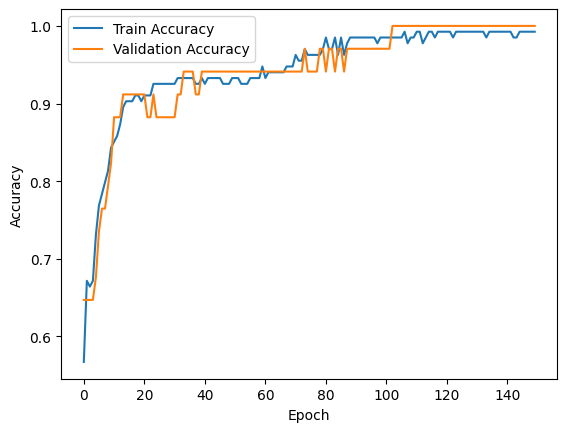

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

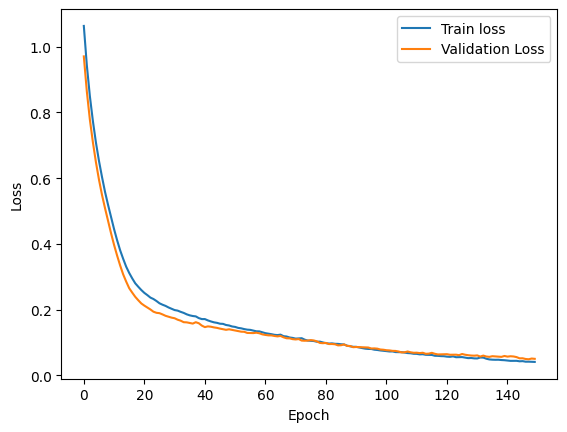

In [14]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0856 - accuracy: 0.9762


[0.08555547147989273, 0.976190447807312]